# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations
There is a strong negative correlation between the max temp and latitude of a significant sample of northen hemisphere cities. As predicted, as distance from the equator increases, temperature should decrease, in general.
Weak correlations between latitude and the other 3 variables (humidity, cloudiness, windspeed) suggest it is hard to predict with any confidence the humidity, cloudiness or windspeed for a given city's latitude.

In [4]:
# Import API key
from config import weather_key

# Dependencies
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


import json
import requests

from citipy import citipy

import time

## Generate Cities List

In [5]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # only keep unique cities
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
columns = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
City_Weather_df = pd.DataFrame(columns = columns)
City_Weather_df["City"]=cities
City_Weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,torbay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,yellowknife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rikitea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,porto novo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,siuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
608,karratha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,samusu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,porto santo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,tibu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
record_num = 1
total_No_Records=len(City_Weather_df)
#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print(''' -----------------------------''')
for column, row in City_Weather_df.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + '&APPID=' + weather_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Retrieved Record {record_num} of {total_No_Records}  | {response["name"]}')
        
        #Input data into the dataframe
        City_Weather_df.loc[column, 'Lat'] = response['coord']['lat']
        City_Weather_df.loc[column, 'Lng'] = response['coord']['lon']
        City_Weather_df.loc[column, 'Max Temp'] = response['main']['temp_max']
        City_Weather_df.loc[column, 'Humidity'] = response['main']['humidity']
        City_Weather_df.loc[column, 'Cloudiness'] = response['clouds']['all']
        City_Weather_df.loc[column, 'Wind Speed'] = response['wind']['speed']
        City_Weather_df.loc[column, 'Country']=response['sys']['country']
        City_Weather_df.loc[column, 'Date'] = response['dt']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print(f"Record {record_num} of {total_No_Records} not found! | Skipping...{row['City']}")
        City_Weather_df = City_Weather_df[City_Weather_df['City'] != row['City']]
        total_No_Records=total_No_Records-1
print('''-----------------------------''')

 -----------------------------
Retrieved Record 1 of 613  | Torbay
Retrieved Record 2 of 613  | Yellowknife
Retrieved Record 3 of 613  | Rikitea
Retrieved Record 4 of 613  | Porto-Novo
Retrieved Record 5 of 613  | Siuna
Retrieved Record 6 of 613  | San Isidro
Retrieved Record 7 of 613  | Puerto Ayacucho
Record 8 of 613 not found! | Skipping...taolanaro
Retrieved Record 8 of 612  | Riyadh


C:\Users\gfg_\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\gfg_\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


Retrieved Record 9 of 612  | Punta Arenas
Retrieved Record 10 of 612  | Plettenberg Bay
Retrieved Record 11 of 612  | Cape Town
Retrieved Record 12 of 612  | Dikson
Record 13 of 612 not found! | Skipping...kamenskoye
Retrieved Record 13 of 611  | Malaṅgawā
Retrieved Record 14 of 611  | Lubango
Retrieved Record 15 of 611  | Piranhas
Retrieved Record 16 of 611  | Saint George
Record 17 of 611 not found! | Skipping...saleaula
Retrieved Record 17 of 610  | Prince Rupert
Retrieved Record 18 of 610  | Bengkulu
Retrieved Record 19 of 610  | Busselton
Retrieved Record 20 of 610  | Nikolskoye
Retrieved Record 21 of 610  | Lüderitz
Retrieved Record 22 of 610  | Qaanaaq
Retrieved Record 23 of 610  | Olafsvik
Retrieved Record 24 of 610  | Lata
Retrieved Record 25 of 610  | Iqaluit
Retrieved Record 26 of 610  | Cabo San Lucas
Retrieved Record 27 of 610  | Waipawa
Retrieved Record 28 of 610  | Butaritari
Retrieved Record 29 of 610  | Ushuaia
Retrieved Record 30 of 610  | Faanui
Retrieved Record 31 o

Retrieved Record 192 of 596  | San Patricio
Retrieved Record 193 of 596  | Hay River
Retrieved Record 194 of 596  | Tilichiki
Retrieved Record 195 of 596  | Mahébourg
Record 196 of 596 not found! | Skipping...kalomo
Retrieved Record 196 of 595  | Dongsheng
Retrieved Record 197 of 595  | Verāval
Retrieved Record 198 of 595  | Bathsheba
Retrieved Record 199 of 595  | Bluff
Retrieved Record 200 of 595  | Talaya
Retrieved Record 201 of 595  | Novyy Karachay
Retrieved Record 202 of 595  | Tiksi
Retrieved Record 203 of 595  | Ucluelet
Retrieved Record 204 of 595  | Calabasas
Retrieved Record 205 of 595  | Port Hueneme
Retrieved Record 206 of 595  | Petropavlovsk-Kamchatskiy
Retrieved Record 207 of 595  | Avera
Retrieved Record 208 of 595  | Noumea
Record 209 of 595 not found! | Skipping...mys shmidta
Retrieved Record 209 of 594  | Pierre
Retrieved Record 210 of 594  | Ratnagiri
Retrieved Record 211 of 594  | Ixtapa
Record 212 of 594 not found! | Skipping...sentyabrskiy
Retrieved Record 212 o

Retrieved Record 375 of 580  | Saint-Pierre
Retrieved Record 376 of 580  | Timmins
Retrieved Record 377 of 580  | Makarov
Retrieved Record 378 of 580  | Kuantan
Retrieved Record 379 of 580  | Ballina
Retrieved Record 380 of 580  | Grand-Santi
Retrieved Record 381 of 580  | Thinadhoo
Retrieved Record 382 of 580  | Omboué
Record 383 of 580 not found! | Skipping...naftah
Retrieved Record 383 of 579  | Visby
Retrieved Record 384 of 579  | Coahuayana Viejo
Retrieved Record 385 of 579  | Brownsville
Retrieved Record 386 of 579  | Departamento de Maldonado
Retrieved Record 387 of 579  | Itaí
Retrieved Record 388 of 579  | Nome
Record 389 of 579 not found! | Skipping...grand river south east
Retrieved Record 389 of 578  | Boende
Retrieved Record 390 of 578  | Sompeta
Retrieved Record 391 of 578  | Son La
Retrieved Record 392 of 578  | Dhidhdhoo
Retrieved Record 393 of 578  | Baoqing
Retrieved Record 394 of 578  | Souillac
Retrieved Record 395 of 578  | Sindor
Retrieved Record 396 of 578  | Bay

Retrieved Record 551 of 559  | Goderich
Retrieved Record 552 of 559  | Odesa
Record 553 of 559 not found! | Skipping...ksenyevka
Retrieved Record 553 of 558  | Dali
Retrieved Record 554 of 558  | Karratha
Record 555 of 558 not found! | Skipping...samusu
Retrieved Record 555 of 557  | Porto Santo
Retrieved Record 556 of 557  | Tibú
Retrieved Record 557 of 557  | Tāndā
-----------------------------


In [8]:
City_Weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,torbay,47.6666,-52.7314,52.68,86,94,10,CA,1635131636
1,yellowknife,62.456,-114.3525,40.41,98,100,17.05,CA,1635131636
2,rikitea,-23.1203,-134.9692,74.68,78,46,16.37,PF,1635131637
3,porto novo,6.4965,2.6036,75.88,87,14,5.64,BJ,1635131638
4,siuna,13.7332,-84.7773,73.15,97,43,2.35,NI,1635131639
...,...,...,...,...,...,...,...,...,...
607,dali,25.7,100.1833,64.65,57,2,4.74,CN,1635132150
608,karratha,-20.7377,116.8463,92.93,22,0,12.28,AU,1635132151
610,porto santo,33.072,-16.3415,68.38,64,40,12.66,PT,1635132152
611,tibu,8.639,-72.7358,73,99,89,2.06,CO,1635132153


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Output File (CSV)
City_Weather_df.to_csv("../output_data/City_Weather_df.csv", encoding="utf-8", index=False)
City_Weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,torbay,47.6666,-52.7314,52.68,86,94,10,CA,1635131636
1,yellowknife,62.456,-114.3525,40.41,98,100,17.05,CA,1635131636
2,rikitea,-23.1203,-134.9692,74.68,78,46,16.37,PF,1635131637
3,porto novo,6.4965,2.6036,75.88,87,14,5.64,BJ,1635131638
4,siuna,13.7332,-84.7773,73.15,97,43,2.35,NI,1635131639


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# I decided to try >99 rather than >100
more_than_100_humidity_df=City_Weather_df[City_Weather_df['Humidity'] > 99]
len(more_than_100_humidity_df)

8

In [11]:
#  Get the indices of cities that have humidity over 99%.
more_than_100_humidity_indices_List=list(City_Weather_df[City_Weather_df['Humidity'] > 99].index.values.astype(int))
more_than_100_humidity_indices_List


[101, 115, 145, 253, 317, 319, 408, 507]

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
Clean_City_Weather_df = City_Weather_df[~City_Weather_df.index.isin(more_than_100_humidity_indices_List)]
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".???
Clean_City_Weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,torbay,47.6666,-52.7314,52.68,86,94,10,CA,1635131636
1,yellowknife,62.456,-114.3525,40.41,98,100,17.05,CA,1635131636
2,rikitea,-23.1203,-134.9692,74.68,78,46,16.37,PF,1635131637
3,porto novo,6.4965,2.6036,75.88,87,14,5.64,BJ,1635131638
4,siuna,13.7332,-84.7773,73.15,97,43,2.35,NI,1635131639
...,...,...,...,...,...,...,...,...,...
607,dali,25.7,100.1833,64.65,57,2,4.74,CN,1635132150
608,karratha,-20.7377,116.8463,92.93,22,0,12.28,AU,1635132151
610,porto santo,33.072,-16.3415,68.38,64,40,12.66,PT,1635132152
611,tibu,8.639,-72.7358,73,99,89,2.06,CO,1635132153


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [13]:
Northern_Hemisphere_df=Clean_City_Weather_df[Clean_City_Weather_df['Lat'] > 0]
Northern_Hemisphere_df
Southern_Hemisphere_df=Clean_City_Weather_df[Clean_City_Weather_df['Lat'] < 0]
Southern_Hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,rikitea,-23.1203,-134.9692,74.68,78,46,16.37,PF,1635131637
5,san isidro,-12.1167,-77.05,62.02,84,0,1.01,PE,1635131640
9,punta arenas,-53.15,-70.9167,33.91,93,90,13.8,CL,1635131351
10,plettenberg bay,-34.0527,23.3716,53.06,76,0,2.53,ZA,1635131644
11,cape town,-33.9258,18.4232,58.26,70,0,3,ZA,1635131646
...,...,...,...,...,...,...,...,...,...
581,tocopilla,-22.092,-70.1979,59.4,74,8,1.5,CL,1635132130
592,rio de janeiro,-22.9028,-43.2075,73.9,89,90,4.61,BR,1635132138
593,namatanai,-3.6667,152.4333,85.33,66,46,5.35,PG,1635132139
601,biak,-0.9131,122.8766,85.17,61,42,2.1,ID,1635132145


## Latitude vs. Temperature Plot

In [14]:
NH_Lat = Northern_Hemisphere_df.iloc[:,1].astype(float)
NH_MT = Northern_Hemisphere_df.iloc[:,3].astype(float)
NH_HU = Northern_Hemisphere_df.iloc[:,4].astype(float)
NH_CL = Northern_Hemisphere_df.iloc[:,5].astype(float)
NH_WS = Northern_Hemisphere_df.iloc[:,6].astype(float)

SH_Lat = Southern_Hemisphere_df.iloc[:,1].astype(float)
SH_MT = Southern_Hemisphere_df.iloc[:,3].astype(float)
SH_HU = Southern_Hemisphere_df.iloc[:,4].astype(float)
SH_CL = Southern_Hemisphere_df.iloc[:,5].astype(float)
SH_WS = Southern_Hemisphere_df.iloc[:,6].astype(float)

NH_MT_slope, NH_MT_int, NH_MT_r, NH_MT_p, NH_MT_std_err = stats.linregress(NH_Lat, NH_MT)
NH_HU_slope, NH_HU_int, NH_HU_r, NH_HU_p, NH_HU_std_err = stats.linregress(NH_Lat, NH_HU)
NH_CL_slope, NH_CL_int, NH_CL_r, NH_CL_p, NH_CL_std_err = stats.linregress(NH_Lat, NH_CL)
NH_WS_slope, NH_WS_int, NH_WS_r, NH_WS_p, NH_WS_std_err = stats.linregress(NH_Lat, NH_WS)


SH_MT_slope, SH_MT_int, SH_MT_r, SH_MT_p, SH_MT_std_err = stats.linregress(SH_Lat, SH_MT)
SH_HU_slope, SH_HU_int, SH_HU_r, SH_HU_p, SH_HU_std_err = stats.linregress(SH_Lat, SH_HU)
SH_CL_slope, SH_CL_int, SH_CL_r, SH_CL_p, SH_CL_std_err = stats.linregress(SH_Lat, SH_CL)
SH_WS_slope, SH_WS_int, SH_WS_r, SH_WS_p, SH_WS_std_err = stats.linregress(SH_Lat, SH_WS)

In [15]:
# getting all my plots in a pdf rather than individual png's
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('My Scatterplots instead of png.pdf')

From a total of 376 randomly selected cities in the Northern Hemisphere
And a total of 173 randomly selected cities in the Southern Hemisphere


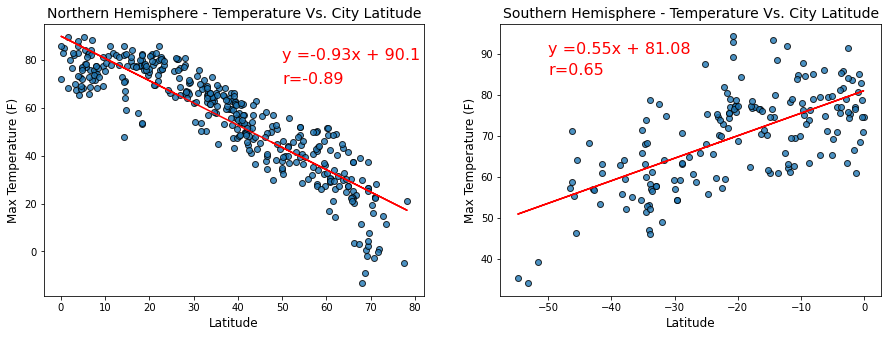

In [16]:
# create figure and axes
fig, axes = plt.subplots(1,2,figsize=(15,5))
ax1 = axes[0]
ax2 = axes[1]

x1=NH_Lat
y1=NH_MT
slope1=NH_MT_slope
int1=NH_MT_int
r1=NH_MT_r

x2=SH_Lat
y2=SH_MT
slope2=SH_MT_slope
int2=SH_MT_int
r2=SH_MT_r


Predicted1 = x1 * slope1 + int1
Predicted2 = x2 * slope2 + int2

# AXES 1 Scatter - Northern Hemisphere - Max Temp Vs Latitude
ax1.scatter(x1, y1, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax1.set_title(f"Northern Hemisphere - Temperature Vs. City Latitude", fontsize = "14")
ax1.set_xlabel(f"Latitude", fontsize="12")
ax1.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 1 Regression Line - Northern Hemisphere - Max Temp Vs Latitude

ax1.plot(x1,Predicted1, "r")
line_eq1 = "y =" + str(round(slope1,2)) + "x + " + str(round(int1,2))
ax1.annotate(line_eq1,(50,80),fontsize=16,color="red")
ax1.annotate(f"r={round(r1,2)}",(50,70),fontsize=16,color="red")

# AXES 2 Scatter - Southern Hemisphere - Max Temp Vs Latitude
ax2.scatter(x2, y2,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax2.set_title(f"Southern Hemisphere - Temperature Vs. City Latitude", fontsize = "14")
ax2.set_xlabel(f"Latitude", fontsize="12")
ax2.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 2 Regression Line - Northern Hemisphere - Max Temp Vs Latitude
ax2.plot(x2,Predicted2, "r")
line_eq2 = "y =" + str(round(slope2,2)) + "x + " + str(round(int2,2))
ax2.annotate(line_eq2,(-50,90),fontsize=16,color="red")
ax2.annotate(f"r={round(r2,2)}",(-50,85),fontsize=16,color="red")

print(f"From a total of {len(Northern_Hemisphere_df)} randomly selected cities in the Northern Hemisphere")
print(f"And a total of {len(Southern_Hemisphere_df)} randomly selected cities in the Southern Hemisphere")

plt.show()
pp.savefig(fig)

## Latitude vs. Humidity Plot

From a total of 376 randomly selected cities in the Northern Hemisphere
And a total of 173 randomly selected cities in the Southern Hemisphere


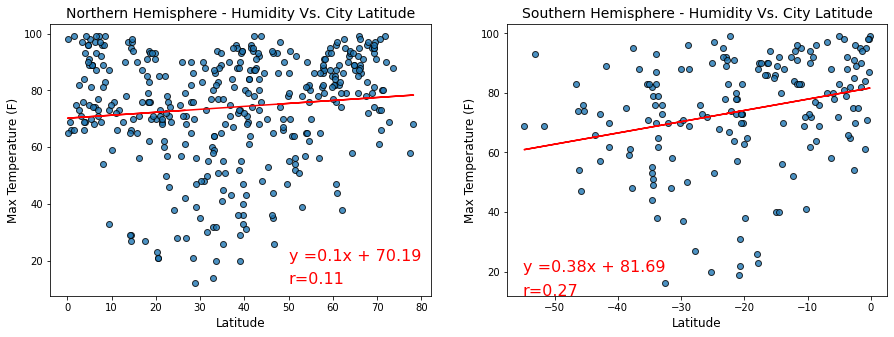

In [17]:
# create figure and axes
fig, axes = plt.subplots(1,2,figsize=(15,5))
ax1 = axes[0]
ax2 = axes[1]

x1=NH_Lat
y1=NH_HU
slope1=NH_HU_slope
int1=NH_HU_int
r1=NH_HU_r

x2=SH_Lat
y2=SH_HU
slope2=SH_HU_slope
int2=SH_HU_int
r2=SH_HU_r


Predicted1 = x1 * slope1 + int1
Predicted2 = x2 * slope2 + int2

# AXES 1 Scatter - Northern Hemisphere - Max Temp Vs Latitude
ax1.scatter(x1, y1, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax1.set_title(f"Northern Hemisphere - Humidity Vs. City Latitude", fontsize = "14")
ax1.set_xlabel(f"Latitude", fontsize="12")
ax1.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 1 Regression Line - Northern Hemisphere - Max Temp Vs Latitude

ax1.plot(x1,Predicted1, "r")
line_eq1 = "y =" + str(round(slope1,2)) + "x + " + str(round(int1,2))
ax1.annotate(line_eq1,(50,20),fontsize=16,color="red")
ax1.annotate(f"r={round(r1,2)}",(50,12),fontsize=16,color="red")

# AXES 2 Scatter - Southern Hemisphere - Max Temp Vs Latitude
ax2.scatter(x2, y2,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax2.set_title(f"Southern Hemisphere - Humidity Vs. City Latitude", fontsize = "14")
ax2.set_xlabel(f"Latitude", fontsize="12")
ax2.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 2 Regression Line - Northern Hemisphere - Max Temp Vs Latitude
ax2.plot(x2,Predicted2, "r")
line_eq2 = "y =" + str(round(slope2,2)) + "x + " + str(round(int2,2))
ax2.annotate(line_eq2,(-55,20),fontsize=16,color="red")
ax2.annotate(f"r={round(r2,2)}",(-55,12),fontsize=16,color="red")

print(f"From a total of {len(Northern_Hemisphere_df)} randomly selected cities in the Northern Hemisphere")
print(f"And a total of {len(Southern_Hemisphere_df)} randomly selected cities in the Southern Hemisphere")

plt.show()
pp.savefig(fig)

## Latitude vs. Cloudiness Plot

From a total of 376 randomly selected cities in the Northern Hemisphere
And a total of 173 randomly selected cities in the Southern Hemisphere


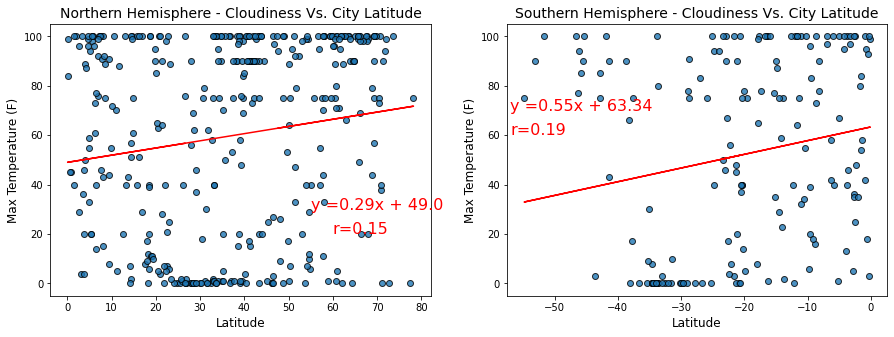

In [18]:
# create figure and axes
fig, axes = plt.subplots(1,2,figsize=(15,5))
ax1 = axes[0]
ax2 = axes[1]

x1=NH_Lat
y1=NH_CL
slope1=NH_CL_slope
int1=NH_CL_int
r1=NH_CL_r

x2=SH_Lat
y2=SH_CL
slope2=SH_CL_slope
int2=SH_CL_int
r2=SH_CL_r


Predicted1 = x1 * slope1 + int1
Predicted2 = x2 * slope2 + int2

# AXES 1 Scatter - Northern Hemisphere - Max Temp Vs Latitude
ax1.scatter(x1, y1, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax1.set_title(f"Northern Hemisphere - Cloudiness Vs. City Latitude", fontsize = "14")
ax1.set_xlabel(f"Latitude", fontsize="12")
ax1.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 1 Regression Line - Northern Hemisphere - Max Temp Vs Latitude

ax1.plot(x1,Predicted1, "r")
line_eq1 = "y =" + str(round(slope1,2)) + "x + " + str(round(int1,2))
ax1.annotate(line_eq1,(55,30),fontsize=16,color="red")
ax1.annotate(f"r={round(r1,2)}",(60,20),fontsize=16,color="red")

# AXES 2 Scatter - Southern Hemisphere - Max Temp Vs Latitude
ax2.scatter(x2, y2,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax2.set_title(f"Southern Hemisphere - Cloudiness Vs. City Latitude", fontsize = "14")
ax2.set_xlabel(f"Latitude", fontsize="12")
ax2.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 2 Regression Line - Northern Hemisphere - Max Temp Vs Latitude
ax2.plot(x2,Predicted2, "r")
line_eq2 = "y =" + str(round(slope2,2)) + "x + " + str(round(int2,2))
ax2.annotate(line_eq2,(-57,70),fontsize=16,color="red")
ax2.annotate(f"r={round(r2,2)}",(-57,60),fontsize=16,color="red")

print(f"From a total of {len(Northern_Hemisphere_df)} randomly selected cities in the Northern Hemisphere")
print(f"And a total of {len(Southern_Hemisphere_df)} randomly selected cities in the Southern Hemisphere")

plt.show()
pp.savefig(fig)

## Latitude vs. Wind Speed Plot

From a total of 376 randomly selected cities in the Northern Hemisphere
And a total of 173 randomly selected cities in the Southern Hemisphere


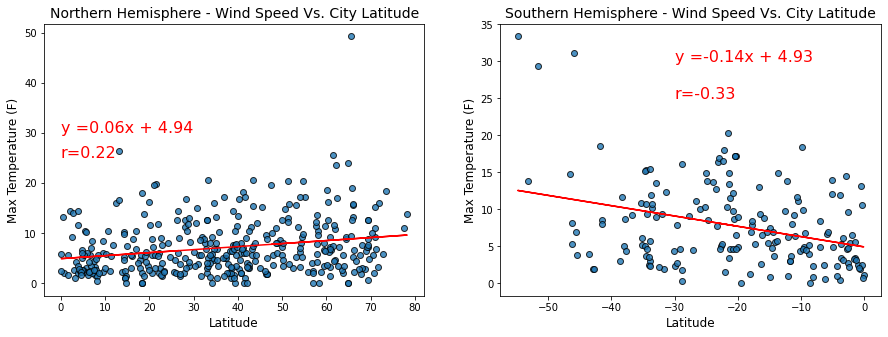

In [19]:
# create figure and axes
fig, axes = plt.subplots(1,2,figsize=(15,5))
ax1 = axes[0]
ax2 = axes[1]

x1=NH_Lat
y1=NH_WS
slope1=NH_WS_slope
int1=NH_WS_int
r1=NH_WS_r

x2=SH_Lat
y2=SH_WS
slope2=SH_WS_slope
int2=SH_WS_int
r2=SH_WS_r


Predicted1 = x1 * slope1 + int1
Predicted2 = x2 * slope2 + int2

# AXES 1 Scatter - Northern Hemisphere - Max Temp Vs Latitude
ax1.scatter(x1, y1, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax1.set_title(f"Northern Hemisphere - Wind Speed Vs. City Latitude", fontsize = "14")
ax1.set_xlabel(f"Latitude", fontsize="12")
ax1.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 1 Regression Line - Northern Hemisphere - Max Temp Vs Latitude

ax1.plot(x1,Predicted1, "r")
line_eq1 = "y =" + str(round(slope1,2)) + "x + " + str(round(int1,2))
ax1.annotate(line_eq1,(0,30),fontsize=16,color="red")
ax1.annotate(f"r={round(r1,2)}",(0,25),fontsize=16,color="red")

# AXES 2 Scatter - Southern Hemisphere - Max Temp Vs Latitude
ax2.scatter(x2, y2,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="cities")
ax2.set_title(f"Southern Hemisphere - Wind Speed Vs. City Latitude", fontsize = "14")
ax2.set_xlabel(f"Latitude", fontsize="12")
ax2.set_ylabel(f"Max Temperature (F)", fontsize="12")

# AXES 2 Regression Line - Northern Hemisphere - Max Temp Vs Latitude
ax2.plot(x2,Predicted2, "r")
line_eq2 = "y =" + str(round(slope2,2)) + "x + " + str(round(int2,2))
ax2.annotate(line_eq2,(-30,30),fontsize=16,color="red")
ax2.annotate(f"r={round(r2,2)}",(-30,25),fontsize=16,color="red")

print(f"From a total of {len(Northern_Hemisphere_df)} randomly selected cities in the Northern Hemisphere")
print(f"And a total of {len(Southern_Hemisphere_df)} randomly selected cities in the Southern Hemisphere")

plt.show()
pp.savefig(fig)

In [20]:
# Closing off my scatterplots in a single pdf
pp.close()